# **How to Fine-Tune LLaVA on Your Custom Dataset?**

Embark on a journey to unlock the full potential of LLaVA in this groundbreaking tutorial. Our focus lies in demystifying the process of fine-tuning LLaVA, making it accessible for AI enthusiasts and developers on Colab Pro or locally. As the first comprehensive guide for beginners, we provide ready-to-use code, simplifying the intricate task of model adaptation. Join us in shaping the future of multimodal AI, where language and vision converge seamlessly. This article is more than a guide; it's a testament to our commitment to simplicity, empowering developers worldwide to harness the capabilities of LLaVA effortlessly. Utilizing the UBIAI tool ensures excellent and precise labeling of our data, further enhancing the quality of the fine-tuning process.

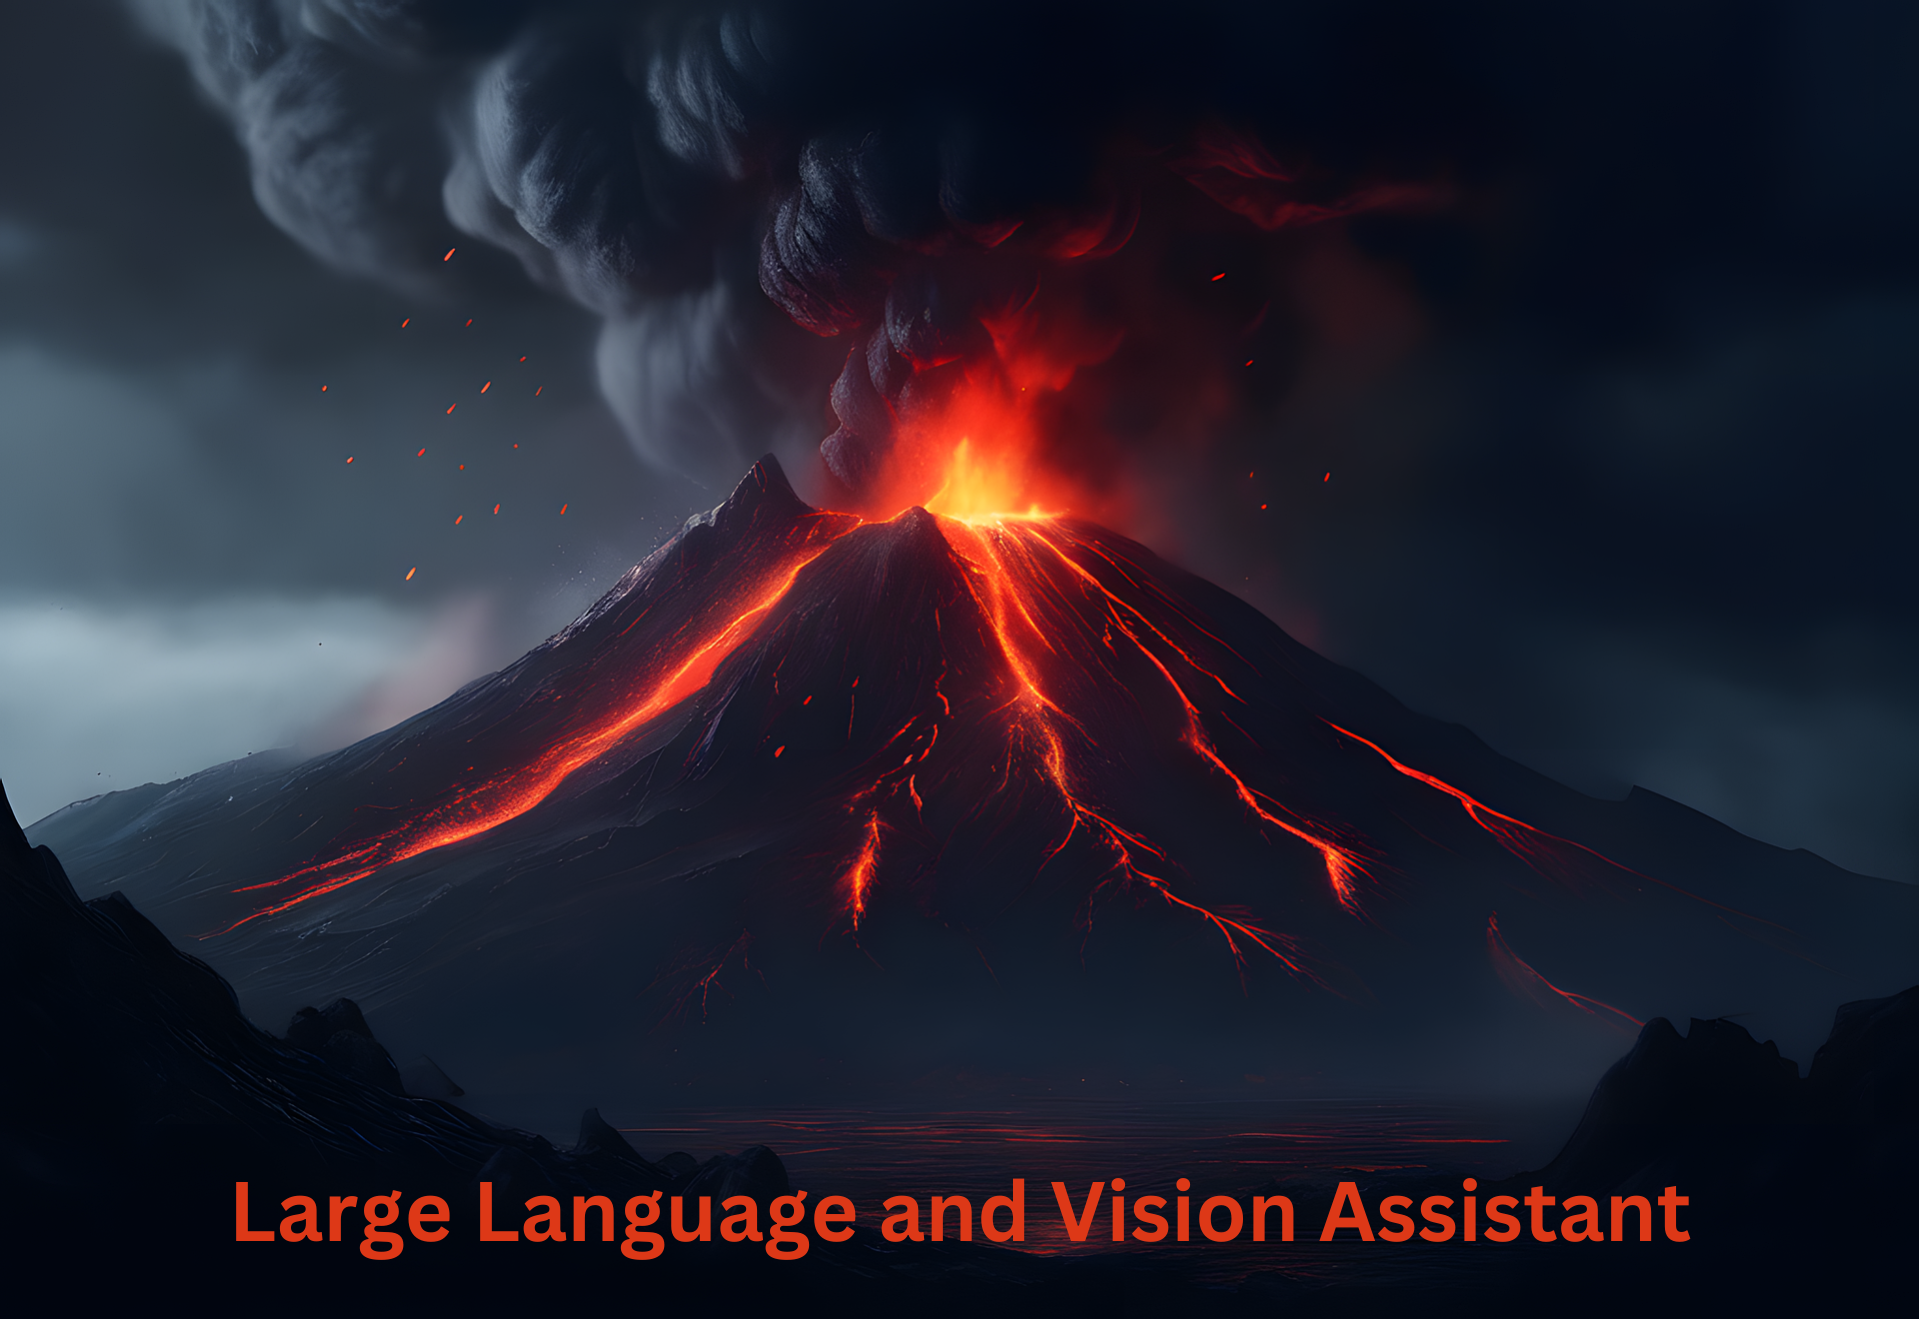

# Unlocking the Power of LLaVA: A New Era in Multimodal AI

In the ever-evolving landscape of artificial intelligence, the integration of language and vision has marked a revolutionary leap forward. Amidst the impressive array of multimodal models, LLaVA (Large Language and Vision Assistant) emerges as a formidable contender, not just rivaling but surpassing the capabilities of many models in the domain.

# Understanding Multimodal Models: A Symphony of Language and Vision

Multimodal models represent the next frontier in AI, combining the prowess of language understanding with visual comprehension. Unlike traditional models that focus solely on text, multimodal models like LLaVA accept both text and images as inputs, allowing them to interpret and generate responses that seamlessly blend language and visual elements.


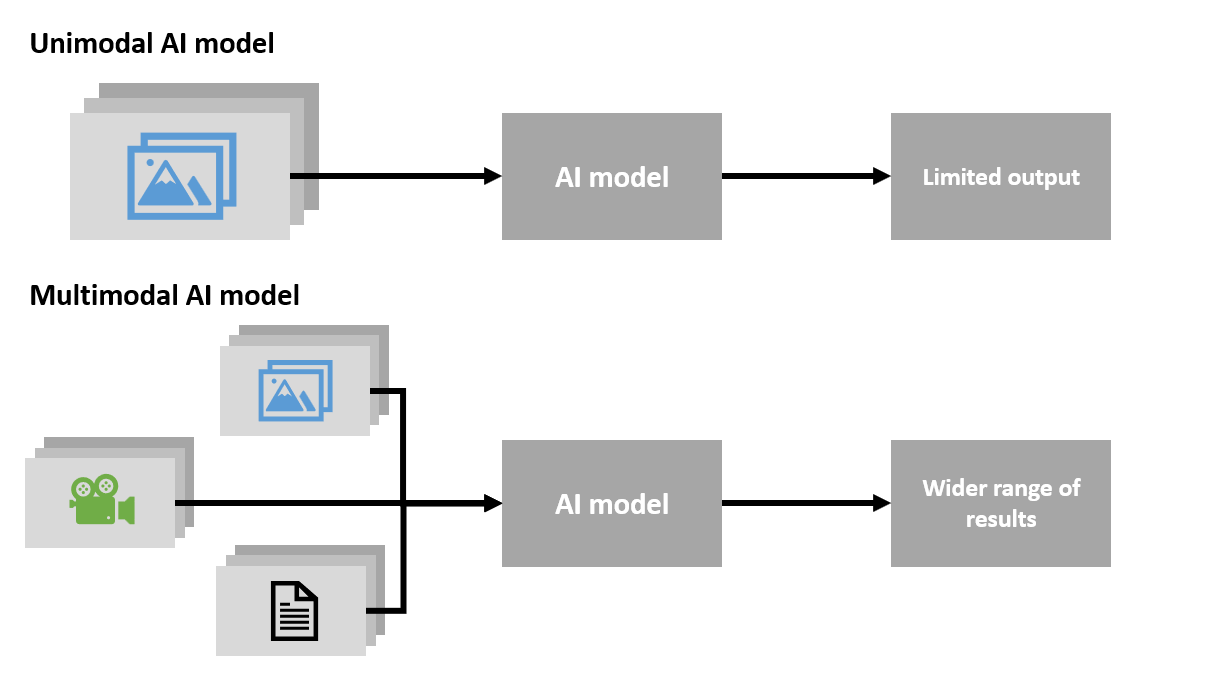

# How LLaVA Works: Bridging Language and Vision

LLaVA stands as a testament to the synergy achievable when language and vision converge. At its core, LLaVA utilizes a sophisticated architecture that intertwines a vision encoder with a large language model (LLM). The visual encoder, CLIP ViT-L/14, excels in extracting features from images, while the language model, Vicuna, is a refined iteration of the open-source LLaMA model, tailored specifically for precise instruction adherence.

The training process involves a dual-phase approach. Initially, the model aligns visual aspects with language using image-text pairs. The subsequent phase, focusing on visual instruction, adds complexity to computational demands. LLaVA, however, rises to the challenge, demonstrating efficiency and high precision in diverse tasks.

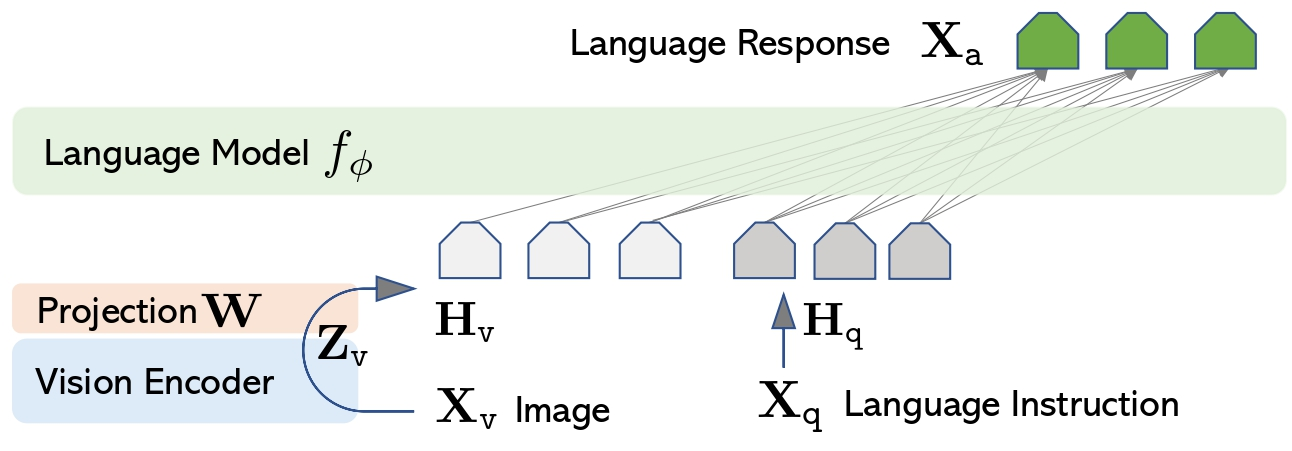

# Why LLaVA Stands Out: Beating the Competition

The success of LLaVA lies not just in its architecture but in its ability to outshine other models. LLaVA 1.5, the latest iteration, goes beyond conventional boundaries by incorporating an MLP (multi-layer perceptron) for enhanced interaction between language and vision. With the integration of academic task-oriented data, LLaVA 1.5 exhibits remarkable performance and effectiveness, setting it apart from its predecessors and competitors.

In comparison to proprietary models like GPT-4 Vision, LLaVA stands tall as an open-source alternative. This openness not only fosters innovation but also addresses potential restrictions imposed by proprietary models. While GPT-4 Vision may hold its ground, LLaVA's cost-effectiveness, scalability, and noteworthy performance in multimodal benchmarks make it a compelling choice for those seeking open-source solutions.

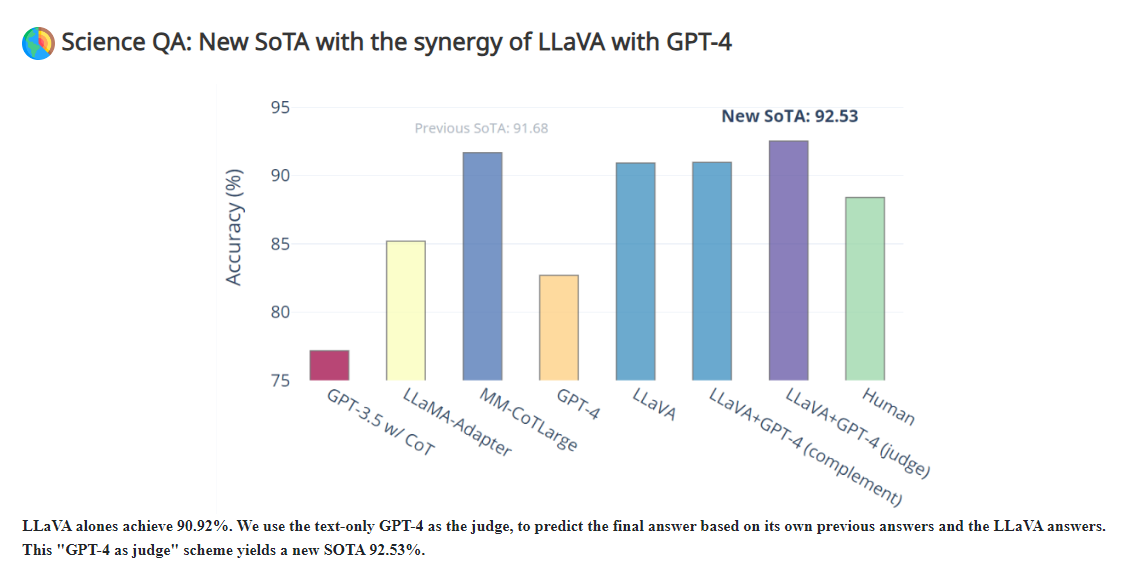

# The Road Ahead: LLaVA and the Future of Generative AI

As we embark on this journey with LLaVA, we catch a glimpse of the future of generative AI. Its open-source nature, continuous advancements, and promising developments such as LLaVA-Med for healthcare applications pave the way for a more inclusive and dynamic realm of multimodal models. With LLaVA leading the charge, the horizon of generative AI is bound to expand, offering new possibilities and reshaping our interactions with intelligent systems.

In the next steps, you'll dive into the fine-tuning process, unlocking the full potential of LLaVA in your specific applications. Get ready to witness the transformative power of multimodal AI with LLaVA as your guide.

# Fine-Tuning LLaVA for Excellence

Fine-tuning isn't merely an adjustment; it's an art – an art that allows you, the orchestrator, to shape LLaVA's responses, making it resonate with the unique chords of your applications. As we dive into the subsequent sections, you'll embark on a journey of fine-tuning, where LLaVA evolves from a model into a tailored virtuoso, delivering excellence that precisely meets your specific requirements. Get ready to unleash the full capabilities of LLaVA through the power of fine-tuning.

**Hardware Setup for LLaVA Fine-Tuning:**

To ensure an efficient fine-tuning process for LLaVA-v1.5-13B, consider the following hardware requirements:

**1. GPUs:**

Recommended GPUs: High-end GPUs like NVIDIA A100 or NVIDIA V100 are suggested for faster training.
Cloud-based Services: If access to such GPUs is unavailable, explore cloud-based services that offer GPU capabilities.

**2. Memory:**

Memory Requirement: For optimal performance, GPUs with a memory capacity of at least 40-80GB are recommended during the fine-tuning of LLaVA.

**3. Parallelism:**

Reducing Training Time: If feasible, employ parallelization across multiple GPUs. This strategy helps reduce the overall training time, enhancing efficiency.

**4. Storage:**

Adequate Storage: Ensure you have sufficient storage space to accommodate the model, datasets, and checkpoints generated during the fine-tuning process.

**Data Structure for Fine-Tuning: Precision Labeling via UBIAI**

When organizing your data for fine-tuning, adhere to the prescribed template. It's worth noting that we leverage the UBIAI tool, renowned for its proficiency in extracting information from images using state-of-the-art OCR models available in the market. This ensures precise labeling and optimal utilization of your data for fine-tuning LLaVA.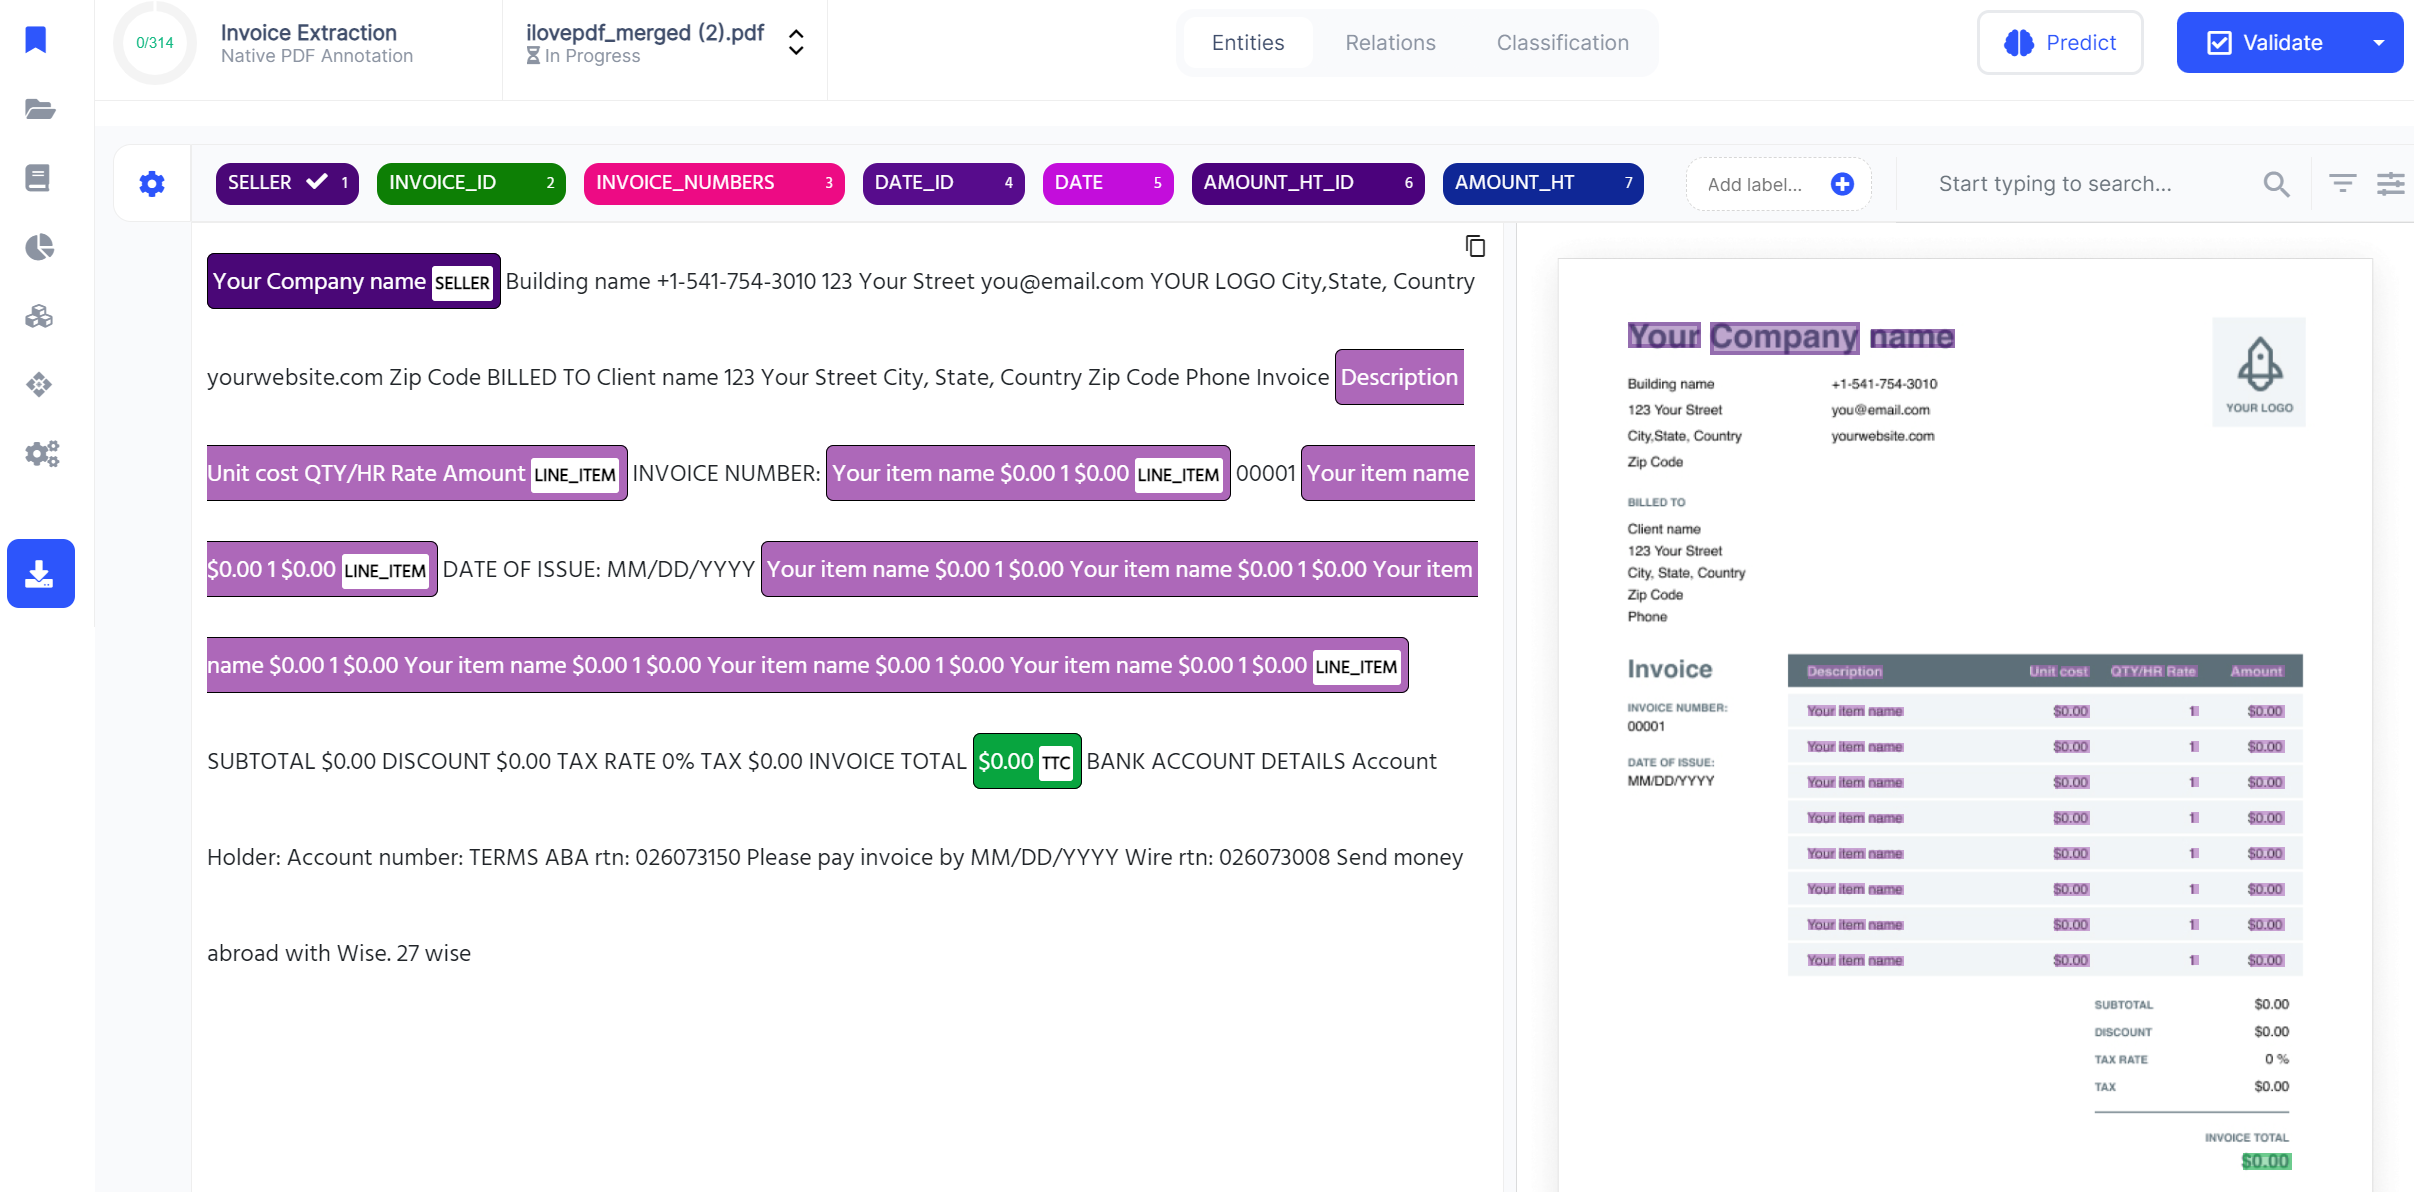

In [ ]:
data = [
  {
    "id": "1",
    "image": "path/to/image1.jpg",
    "conversations": [
      {
        "from": "human",
        "value": "<image>\nWhat can you tell me about this scene?"
      },
      {
        "from": "gpt",
        "value": "LLaVA-generated information about the scene."
      }
    ]
  },
  {
    "id": "2",
    "image": "path/to/image2.jpg",
    "conversations": [
      {
        "from": "human",
        "value": "<image>\nAsk LLaVA to describe the content of this image."
      },
      {
        "from": "gpt",
        "value": "A description of the image content by LLaVA."
      }
    ]
  }
]

In order to commence the fine-tuning journey for LLaVA, we kick off by setting up the essential environment and installing the required packages. The following lines of code ensure the presence of key dependencies, including PyTorch, Transformers, DeepSpeed, and WandB. Let's dive into the initial setup:

In [ ]:
import os
# Install necessary packages
!pip install torch==1.10.0+cu113 torchvision==0.11.1+cu113 torchaudio==0.10.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html
!pip install transformers
!pip install deepspeed
!pip install wandb

# Clone the LLaVA repository
!git clone https://github.com/haotian-liu/LLaVA.git
os.chdir("LLaVA")

With the environment set up, we proceed to load the pre-trained LLaVA model for fine-tuning. The following lines of code utilize the LLaVA model builder and evaluation utilities. The specified model path, 'liuhaotian/llava-v1.5-7b,' is loaded along with associated components such as the tokenizer, the model itself, the image processor, and the context length. Let's take a closer look at the fine-tuning initialization:

In [ ]:
from llava.model.builder import load_pretrained_model
from llava.mm_utils import get_model_name_from_path
from llava.eval.run_llava import eval_model

model_path = "liuhaotian/llava-v1.5-7b"

tokenizer, model, image_processor, context_len = load_pretrained_model(
    model_path=model_path,
    model_base=None,
    model_name=get_model_name_from_path(model_path),
    offload_folder="/content/llava_model"
)


To initiate the fine-tuning process, we configure the necessary paths and parameters for the LLaVA model. The subsequent script employs DeepSpeed to leverage distributed training efficiently. The paths for the data, images, and the desired output directory are defined, ensuring a seamless integration of the fine-tuning pipeline. The script encompasses various settings, including the use of LoRA (Local Regions of Attention) for enhanced performance, DeepSpeed configurations, and model-specific details such as the vision tower. Let's delve into the fine-tuning command script:

In [ ]:
# Assign paths to variables
DEEPSPEED_SCRIPT = "deepspeed llava/train/train_mem.py"
DEEPSPEED_JSON = "./scripts/zero3.json"
MODEL_NAME = "liuhaotian/llava-v1.5-7b"
DATA_PATH = "/path/to/your/data.json"  # Replace with your JSON data path
IMAGE_FOLDER = "/path/to/your/image_folder"  # Replace with your image folder path
VISION_TOWER = "openai/clip-vit-large-patch14-336"
OUTPUT_DIR = "/path/to/your/output_directory"  # Replace with your desired output directory path

In [ ]:
# Command to run the script
finetune_script = f'''
{DEEPSPEED_SCRIPT} \
    --lora_enable True --lora_r 128 --lora_alpha 256 --mm_projector_lr 2e-5 \
    --deepspeed {DEEPSPEED_JSON} \
    --model_name_or_path {MODEL_NAME} \
    --version v1 \
    --data_path {DATA_PATH} \
    --image_folder {IMAGE_FOLDER} \
    --vision_tower {VISION_TOWER} \
    --mm_projector_type mlp2x_gelu \
    --mm_vision_select_layer -2 \
    --mm_use_im_start_end False \
    --mm_use_im_patch_token False \
    --image_aspect_ratio pad \
    --group_by_modality_length True \
    --bf16 True \
    --output_dir {OUTPUT_DIR} \
    --num_train_epochs 5 \
    --per_device_train_batch_size 16 \
    --per_device_eval_batch_size 4 \
    --gradient_accumulation_steps 1 \
    --evaluation_strategy "no" \
    --save_strategy "steps" \
    --save_steps 50000 \
    --save_total_limit 1 \
    --learning_rate 2e-4 \
    --weight_decay 0. \
    --warmup_ratio 0.03 \
    --lr_scheduler_type "cosine" \
    --logging_steps 1 \
    --tf32 True \
    --model_max_length 2048 \
    --gradient_checkpointing True \
    --dataloader_num_workers 4 \
    --lazy_preprocess True \
    --report_to wandb
'''

To commence the fine-tuning process, we clear the CUDA cache using torch.cuda.empty_cache() to ensure efficient memory utilization. The subsequent line executes the fine-tuning script, orchestrating the training of the LLaVA model with the configured settings.

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
# Execute the fine-tuning script
!{finetune_script}

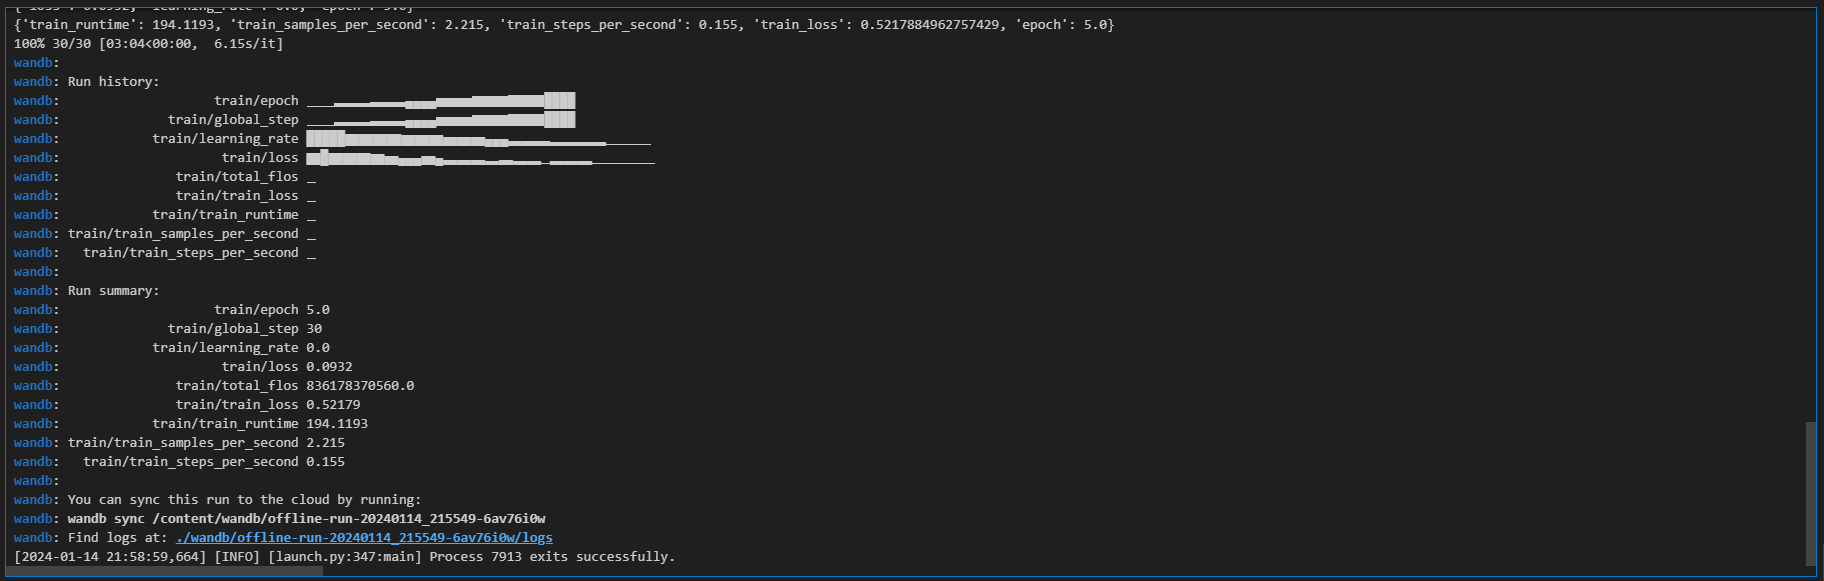

Post fine-tuning, we merge the LoRA (Local Regions of Attention) weights with the updated model weights using the script merge_lora_weights.py. This ensures that the enriched contextual information captured by LoRA during fine-tuning is seamlessly integrated into the LLaVA model. The merged model is then saved for subsequent usage

In [ ]:
!python /content/LLaVA/scripts/merge_lora_weights.py --model-path /path/to/checkpoints/llava-v1.5-7b-task-lora --model-base liuhaotian/llava-v1.5-7b --save-model-path /output/merged_model

To validate the efficacy of our fine-tuned LLaVA model, we load the merged model obtained after the finetuning process. This involves setting up the evaluation parameters, including the prompt and image file, to assess the model's performance on a specific task. The evaluation script is then executed, providing insights into the model's ability to generate accurate and contextually relevant responses in a multimodal context.

In [ ]:
from llava.model.builder import load_pretrained_model
from llava.mm_utils import get_model_name_from_path
from llava.eval.run_llava import eval_model

# Path to your fine-tuned model
fine_tuned_model_path = "/path/to/your/llava_merged_model"

# Load the fine-tuned model
tokenizer, model, image_processor, context_len = load_pretrained_model(
    model_path=fine_tuned_model_path,
    model_base=None,  # Adjust if necessary based on your training configuration
    model_name=get_model_name_from_path(fine_tuned_model_path)
)


# Evaluation setup
prompt = "EXTRACT THE CHECKED ANSWERS from the checkboxes?"
image_file = "/path/to/your/test_image.jpg"
# Set up evaluation arguments
args = type('Args', (), {
    "model_path": fine_tuned_model_path,
    "model_base": None,
    "model_name": get_model_name_from_path(fine_tuned_model_path),
    "query": prompt,
    "conv_mode": None,
    "image_file": image_file,
    "sep": ",",
    "temperature": 0,
    "top_p": None,
    "num_beams": 1,
    "max_new_tokens": 512
})()

# Perform evaluation with the fine-tuned model
eval_model(args)

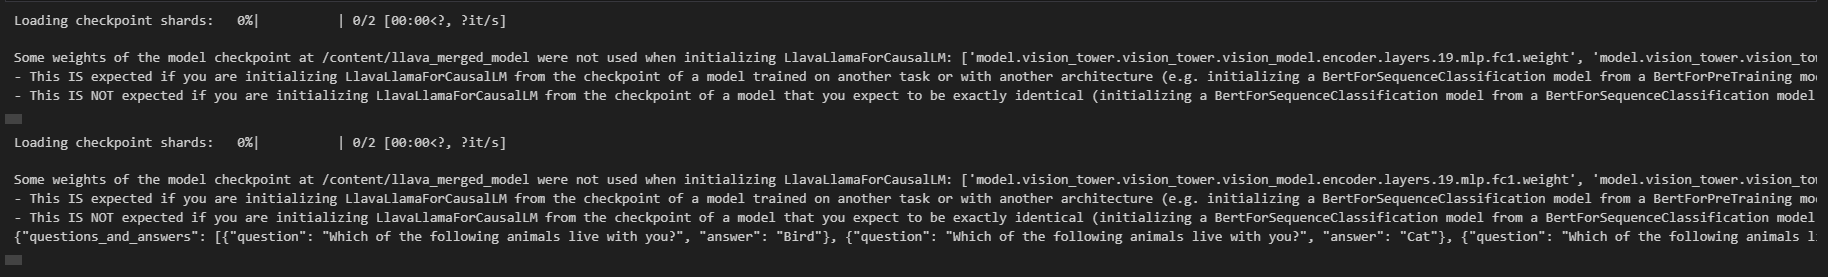

# Conclusion

In summary, multimodal models revolutionize AI by seamlessly combining language and vision. Fine-tuning, exemplified with LLaVA, enhances adaptability and performance, excelling in diverse tasks. This tutorial, accessible in Colab, invites AI enthusiasts to explore parameter adjustments for personalized improvements. As we navigate the AI landscape, the collaboration of language and vision fuels innovation. Fine-tuning allows tailoring models, and this Colab tutorial invites you to experiment, contributing to the continuous advancement of multimodal AI.